In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Clone the entire repo.
!git clone -l -s git://github.com/tusharnandy/MLProjects.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 30 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 6.03 MiB | 4.57 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/cloned-repo
data_cleaned.csv  master.csv  README.md  RecEng  SelfProject-PGAdmissions.pdf


In [3]:
df = pd.read_csv('data_cleaned.csv')
df.drop(df.columns[0],axis=1, inplace=True)
df.head(20)

price  retail_price  units_sold  ...  merchant_rating  feedback   notes
0   16.00            14       100.0  ...         4.128521         0     568
1    8.00            22     20000.0  ...         3.899673        83   17752
2    8.00            43       100.0  ...         3.989831        86     295
3    8.00             8      5000.0  ...         4.020435         0   23832
4    2.72             3       100.0  ...         4.001588        85   14482
5    3.92             9        10.0  ...         3.507692        75      65
6    7.00             6     50000.0  ...         4.076516        86   10194
7   12.00            11      1000.0  ...         3.681287         0     342
8   11.00            84       100.0  ...         3.803030        82     330
9    5.78            22      5000.0  ...         3.999819        85    5534
10   5.79             5      1000.0  ...         3.956811        84    9470
11   6.00             8       100.0  ...         3.983784        84    3515
12   1.91             6      1000.0  ...         4.123878         0     557
13   5.79            42      1000.0  ...         3.947472        83    5083
14   2.00             2     20000.0  ...         4.138885         0   55499
15  11.00            81      1000.0  ...         4.066326        86   39381
16  11.00            10     10000.0  ...         3.958426         0    6302
17   5.00            25    100000.0  ...         3.933581        84  139223
18   9.00             9     20000.0  ...         4.081624        87   22089
19   7.00             7      1000.0  ...         4.062361        86    3592

[20 rows x 30 columns]

The two pairs of data that I have chosen to investigate are

1. merchant_rating v/s rating
2. price v/s retail price


## Section a.

### a.1 merchant_rating v/s rating

In [4]:
columns1 = ['merchant_rating', 'rating']

for val in columns1:
  mu = df[val].mean()
  s = df[val].var()
  print("\033[1m" + f"{val}: " + "\033[0m")
  print(f"sample mean: {mu}")
  print(f"sample variance: {s}\n")

merchant_rating: 
sample mean: 4.031561780295667
sample variance: 0.041755131586848994

rating: 
sample mean: 3.820082855321857
sample variance: 0.26593105180408644



### a.2 price v/s retail price

In [5]:
columns2 = ['price', 'retail_price']

for val in columns2:
  mu = df[val].mean()
  s = df[val].var()
  print("\033[1m" + f"{val}: " + "\033[0m")
  print(f"sample mean: {mu}")
  print(f"sample variance: {s}\n")

price: 
sample mean: 8.326838750796673
sample variance: 15.495147908293326

retail_price: 
sample mean: 23.279158699808796
sample variance: 923.6363064346182



## Section b.

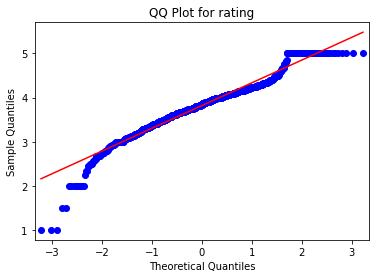

In [6]:
for val in columns1:
  sm.qqplot(df[val], line='s');
  plt.title(f'QQ Plot for {val}')
  plt.show()

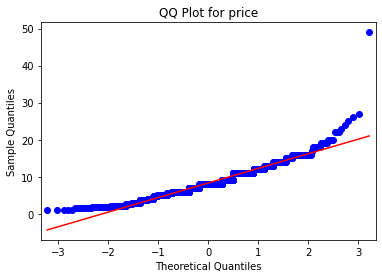

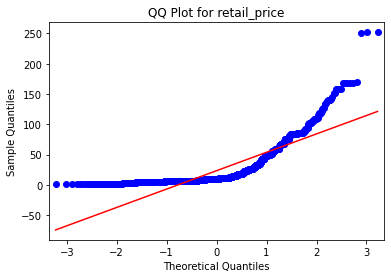

In [7]:
for val in columns2:
  data = df[val]
  sm.qqplot(data, line='s');
  plt.title(f'QQ Plot for {val}')
  plt.show()

## Section c.

In [8]:
def GLL(pandas_series):
  mu = pandas_series.mean()
  sigma = np.sqrt(pandas_series.var(ddof=1)) # sample variance
  g = lambda x: np.exp((-1 * (x-mu)**2)/(2*(sigma**2)))/(sigma*np.sqrt(2*np.pi))
  gaussian_estimates = g(pandas_series)
  log_estimates = np.log(gaussian_estimates)
  log_likelihood = log_estimates.sum()
  return log_likelihood  

#### Log Likelihood for merchant_rating v/s rating

In [9]:
for val in columns1:
  data = df[val]
  log_likelihood = GLL(data)
  print("\033[1m" + f"{val}: " + "\033[0m")
  print(f"Log Likelihood: {log_likelihood}\n")

merchant_rating: 
Log Likelihood: 265.7048194785105

rating: 
Log Likelihood: -1186.7300247802013



The log-likelihood of a density function can very well be positive. It has to be particularly negative for probability values

#### For retail_price vs price

In [12]:
for val in columns2:
  data = df[val]
  log_likelihood = GLL(data)
  print("\033[1m" + f"{val}: " + "\033[0m")
  print(f"Log Likelihood: {log_likelihood}\n")

price: 
Log Likelihood: -4375.757940473721

retail_price: 
Log Likelihood: -7582.630332731346



## Section d.

In this part,we have to calculate the 95% confidence interval. This is given by:

$$\bar{X} \pm \frac{Z_{0.95}*s}{\sqrt{N}}$$

- Where $Z_{0.95}$ is the Z-value corresponding to 95% C.I. which is 1.960
- s is the standard deviation
- N is the sample size

In [13]:
def CI95(data):
  sigma = np.sqrt(data.var())
  N = len(data)
  Z = 1.96
  val = Z*sigma/np.sqrt(N)
  return val

#### merchant_rating vs rating

In [23]:
for val in columns1:
  data = df[val]
  length = CI95(data)
  mu = data.mean()
  print("\033[1m" + f"{val}: " + "\033[0m")
  print(f"95% CI: {mu} +/- {length}\n")

merchant_rating: 
95% CI: 4.031561780295667 +/- 0.010111126128024782

rating: 
95% CI: 3.820082855321857 +/- 0.025516971303054945



In [24]:
for val in columns2:
  data = df[val]
  length = CI95(data)
  mu = data.mean()
  print("\033[1m" + f"{val}: " + "\033[0m")
  print(f"95% CI: {mu} +/- {length}\n")

price: 
95% CI: 8.326838750796673 +/- 0.19477914836467244

retail_price: 
95% CI: 23.279158699808796 +/- 1.5038173721718697



## Part e.
We now perform the Welch T-testand the Wilcoxon signed rank test for both the pairs

#### Part e (1)
Welch T-test

$$t = \frac{\bar{\mu_1} - \bar{\mu_2}}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}}$$

Corresponding to this t-value, we can generate a p-value.
If the p-value is greater than $\alpha = 0.05$, we can not reject the null hypothesis.

A table for finding p-val for given t-val: https://www.math.arizona.edu/~piegorsch/571A/TR194.pdf

To reiterate, we are performing a two-tailed t-test, because we are interested in knowing whether a distribution is different from the other or not. We are not particulalry looking for an increase or decrease in mean values.

In [25]:
from scipy import stats

(e.1.1) Welch t-test for merchant_rating vs rating

In [32]:
x1 = np.array(df['merchant_rating'].tolist())
y1 = np.array(df['rating'].tolist())

t,p = stats.ttest_ind(x1,y1,equal_var=False)

print(f"t-value: {t}")
print(f"p-val: {p}")

t-value: 15.101655833422118
p-val: 6.1519277822801905e-49


In [33]:
sns.distplot(df['merchant_rating']);
sns.distplot(df['rating']);
plt.legend(['merchant_rating', 'rating']);
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(e.1.2) Welch t-test for price vs retail_price

In [34]:
x2 = np.array(df['retail_price'].tolist())
y2 = np.array(df['price'].tolist())

t,p = stats.ttest_ind(x2,y2,equal_var=False)

print(f"t-value: {t}")
print(f"p-val: {p}")

t-value: 19.326662379660117
p-val: 4.693539901048621e-75


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


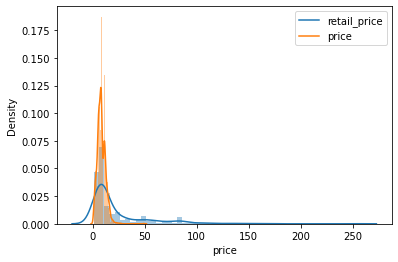

In [35]:
sns.distplot(df['retail_price'])
sns.distplot(df['price'])
plt.legend(['retail_price', 'price'])
plt.show()

**Combined conclusion from the welch t-test**

The p-vaues from both the pairs are very small. Hence, we can reject the null hypothesis and conclude that the distributions are fifferent, in both the cases.

Interstingly enough, the means in both the distributions appear to be quite close but the overall plots are quite different which is in agreement with the t-test

#### Part e(2)
$\text{Wilcoxon Signed Rank Test}$

It is a non-parametric test, which is less powerful because it does not assume any particular distribution and is more generic.

The algorithm is quite elaborate to be written. Refer: https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

We will use the same significance level  α=0.05 .

e.2.1) For merchant_rating vs rating

In [36]:
w,p = stats.wilcoxon(x1,y1)
print(f"Test statistic: {w}")
print(f"p-value: {p}")

Test statistic: 291932.0
p-value: 1.390861498664353e-72


e.2.2) For retail_price vs price

In [37]:
w,p = stats.wilcoxon(x2,y2)
print(f"Test statistic: {w}")
print(f"p-value: {p}")

Test statistic: 219580.0
p-value: 3.67475823796959e-67


**Combined conclusion**

We see that both the p-values are significantly smaller than 0.05, hence the null hypothesis can be rejected and the distributions in both the pairs of data are different.


_____
### Part f
$\text{The paired t-test}$

As stated earlier, we first set the significance level $\alpha = 0.05$. The corresponding value from the t-table for this alpha is $t_{0.95} \approx 2.00$.

We reject the null hypothesis when $\lvert t \rvert > t_{1-\alpha}$.

In [44]:
def paired_test(columns): # taking input as an array of column names
  x = np.array(df[columns[0]].tolist())
  y = np.array(df[columns[1]].tolist())

  dbar = (y-x).mean()
  s_d = np.sqrt((y-x).var())
  t = dbar*np.sqrt(len(x))/s_d
  
  print(f"Paired t-test b/w {columns[0]} and {columns[1]}\n")
  print(f"The t-value is {t}")

  if abs(t) > 2.00:
    print("The null hypothesis is rejected")
  else:
    print("The null hypothesis can't be rejected")

In [45]:
paired_test(columns1)

Paired t-test b/w merchant_rating and rating

The t-value is -16.50156170765468
The null hypothesis is rejected


In [46]:
paired_test(columns2)

Paired t-test b/w price and retail_price

The t-value is 20.13012962097311
The null hypothesis is rejected


### Part g
Here, I have attempted to explore the correlation of 'price' with 'rating' and 'merchant_rating'.

In [47]:
from sklearn.linear_model import LinearRegression

In [52]:
def correlation(columns):
  X = df[[columns[0]]]
  x = df[columns[0]]
  y = df[columns[1]]

  corr, p = stats.pearsonr(x,y)
  lr = LinearRegression()
  lr.fit(X,y)
  y_hat = lr.predict(X)

  plt.scatter(X,y, label='original values')
  plt.plot(X, y_hat, color='red', label='predicted values')
  plt.legend()
  plt.title(f"{columns[0]} vs {columns[1]}")

  print(f"\n The correlation value is: {corr}")
  print(f"The r^2 values is: {lr.score(X,y)}")  


 The correlation value is: 0.05390479020257143
The r^2 values is: 0.0029057264067832156


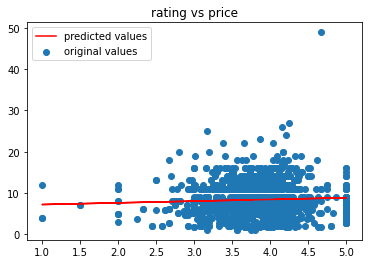

In [53]:
correlation(['rating', 'price'])


 The correlation value is: 0.0474273577998776
The r^2 values is: 0.0022493542678775347


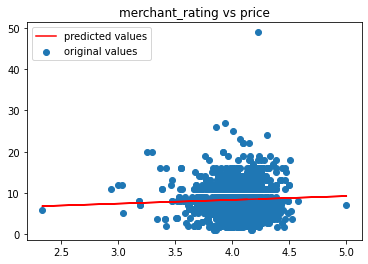

In [54]:
correlation(['merchant_rating', 'price'])

**Combined Conclusion**

In both the cases, we see that the price is poorly correlated to both 'rating' and 'merchant_rating'.

### Part h

**Chi-squared test**

The Chi-Square test is performed between 'uses_ad_boosts' and 'has_urgency_banner'. We will indeed prove that these two distributions do not fit one-another, and are quite different.

In [61]:
x = df['uses_ad_boosts'].value_counts().tolist()

In [62]:
y = df['has_urgency_banner'].value_counts().tolist()

In [66]:
statisitic, p_val = stats.chisquare(x, y)

In [67]:
print(p_val)

1.1494913770970752e-30


As we can see, the p-value is extremely small, which motivates us to reject the null hypothesis.

Hence, we conslude that these are two absolutely different distributions.